In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # module for plotting 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


## **USING LSTM**

Reading the dataset

In [0]:
dataframe = pd.read_excel("/content/drive/My Drive/dailySolarWithFeatures.xlsx")
dataframe.to_csv("/content/drive/My Drive/dailySolarWithFeatures.csv")


Converting the time series to supervised learning model.

In [42]:
#The following code takes the past data(t-1) and predicts the current value
#converting the time series model into a supervised model for fitting the data into the LSTM
#n_in<- number of inputs required(1)
#n_in<- number of outputs required(1)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))# shift is a pandas function-create columns of lag observations as well as columns of forecast observations for a time series dataset in a supervised learning format.
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]# we find value(t-1) for each column
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = pd.read_csv('/content/drive/My Drive/dailySolarWithFeatures.csv', header=0, index_col=0)
values = dataset[['Solar Irradiance(W/m2)','LUX Level(lx)','Panel_Temp( C)','Temp( C)','Solar_Power_Generation( Kw)']].values 
#len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
reframed


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.000000,0.825397,0.000000,0.199491,0.006637,0.732273,0.904762,0.889217,0.199491,0.735713
2,0.732273,0.904762,0.889217,0.199491,0.735713,0.675996,0.571429,0.898080,0.199491,0.708200
3,0.675996,0.571429,0.898080,0.199491,0.708200,0.693312,0.746032,0.862629,0.199491,0.537179
4,0.693312,0.746032,0.862629,0.199491,0.537179,0.640319,0.793651,0.800591,0.199491,0.681015
5,0.640319,0.793651,0.800591,0.199491,0.681015,0.623899,0.714286,0.822747,0.199491,0.647829
6,0.623899,0.714286,0.822747,0.199491,0.647829,0.580385,0.682540,0.791728,0.199491,0.195389
7,0.580385,0.682540,0.791728,0.199491,0.195389,0.638230,0.761905,0.759232,0.199491,0.662416
8,0.638230,0.761905,0.759232,0.199491,0.662416,0.660994,0.793651,0.775480,0.199491,0.727397
9,0.660994,0.793651,0.775480,0.199491,0.727397,0.806986,0.571429,0.645495,0.199491,0.608894
10,0.806986,0.571429,0.645495,0.199491,0.608894,0.787730,0.746032,0.824225,0.149619,0.729500


In [44]:
values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :5], train[:, 5]#takes the first 5 columns
test_X, test_y = test[:, :5], test[:, 5]#takes the last column.
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 5) (365,) (140, 1, 5) (140,)


LSTM Model

In [45]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.7))
#model.add(LSTM(128,activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               42400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
early_stopping_monitor = EarlyStopping(patience=4)
history = model.fit(train_X, train_y, epochs=30, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False,callbacks=[early_stopping_monitor])
#the loss is low at the same time the accuracy is also low.

Train on 365 samples, validate on 140 samples
Epoch 1/30
 - 1s - loss: 0.4972 - val_loss: 0.3746
Epoch 2/30
 - 0s - loss: 0.4269 - val_loss: 0.3152
Epoch 3/30
 - 0s - loss: 0.3573 - val_loss: 0.2602
Epoch 4/30
 - 0s - loss: 0.2930 - val_loss: 0.2089
Epoch 5/30
 - 0s - loss: 0.2402 - val_loss: 0.1611
Epoch 6/30
 - 0s - loss: 0.1792 - val_loss: 0.1170
Epoch 7/30
 - 0s - loss: 0.1344 - val_loss: 0.0795
Epoch 8/30
 - 0s - loss: 0.1013 - val_loss: 0.0508
Epoch 9/30
 - 0s - loss: 0.0716 - val_loss: 0.0320
Epoch 10/30
 - 0s - loss: 0.0481 - val_loss: 0.0223
Epoch 11/30
 - 0s - loss: 0.0480 - val_loss: 0.0187
Epoch 12/30
 - 0s - loss: 0.0408 - val_loss: 0.0182
Epoch 13/30
 - 0s - loss: 0.0471 - val_loss: 0.0184
Epoch 14/30
 - 0s - loss: 0.0461 - val_loss: 0.0182
Epoch 15/30
 - 0s - loss: 0.0449 - val_loss: 0.0179
Epoch 16/30
 - 0s - loss: 0.0434 - val_loss: 0.0179
Epoch 17/30
 - 0s - loss: 0.0383 - val_loss: 0.0182
Epoch 18/30
 - 0s - loss: 0.0444 - val_loss: 0.0184
Epoch 19/30
 - 0s - loss: 0

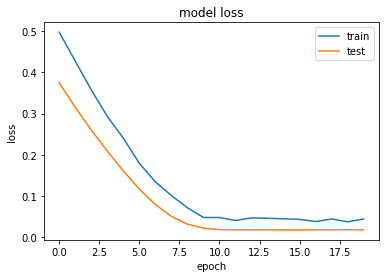

In [47]:
import matplotlib.pyplot as plt # module for plotting 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
#. Difficulty in improving accuracy, extreme overfitting

In [0]:
#test_X.shape
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],5))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

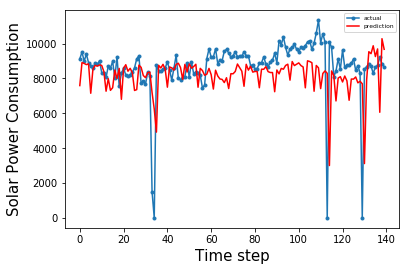

In [49]:
aa=[x for x in range(len(inv_y))]
plt.plot(aa, inv_y[:,], marker='.', label="actual")
plt.plot(aa, inv_yhat[:,], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [50]:
error_list = list()

for i in range (len(test_y)):
  error = 100*abs(inv_yhat[i]-inv_y[i])/inv_y[i]
  print('predicted=%f, expected=%f' % (inv_yhat[i], inv_y[i]),'error=%f',error)
  
error_list.append(error)

predicted=7592.450195, expected=9125.000000 error=%f 16.795066352739727
predicted=8910.870117, expected=9513.000000 error=%f 6.329547806291391
predicted=8863.235352, expected=8994.000000 error=%f 1.453909811402046
predicted=8794.715820, expected=9396.000000 error=%f 6.399363342778842
predicted=8836.158203, expected=8905.000000 error=%f 0.7730690272318922
predicted=7151.872559, expected=8701.000000 error=%f 17.80401610626652
predicted=8531.047852, expected=8628.000000 error=%f 1.1236920310326843
predicted=8754.287109, expected=8873.000000 error=%f 1.3379115364025695
predicted=8709.310547, expected=8802.000000 error=%f 1.0530499105316973
predicted=8775.900391, expected=9012.000000 error=%f 2.619835878550821
predicted=8752.000000, expected=8338.000000 error=%f 4.965219477092828
predicted=8396.998047, expected=8330.000000 error=%f 0.8042982818127251
predicted=7269.499023, expected=8063.000000 error=%f 9.841262266681136
predicted=7988.414062, expected=8707.000000 error=%f 8.252968157804066


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [51]:
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')



 Mean Error in Predicting Test Case Articles : 11.561730  %
